# Final Project: How Avocado Price Can Impact Chipotle's Share Price
### By: Mike Ding (michael.ding@stern.nyu.edu)

### Introduction

This project will examine the degree to which price fluctuations of avocados, a key ingredient used by Chipotle, can affect the price of Chipotle's stock. A major buyer of Hass avocados in specific, Chipotle estimates that it uses upwards of 400,000 each day nationally. The goal is to visualize and understand the relationship between prices.

The datasets I used are explained more in-depth below; all the data was available for free online. My project will include the following figures:

- graphs (scatter and line) that compare the percent change in avocado prices (both organic and non-organic) with the percent change in Chipotle's share price (weekly average closing)

- a scatter comparing the percent change in avocado prices (both organic and non-organic) with the percent difference of the weekly average closing price and weekly high/low prices for Chipotle

- a scatter plot comparing the percent change in avocado prices (both organic and non-organic) with the transaction volume for Chipotle during the week

### Data Report

For the avocado data, I will be using weekly data from the Hass Avocado Board.
(https://www.kaggle.com/neuromusic/avocado-prices/version/1)

This dataset provides the average price per week of avocados, and for each of these values, the total volume bought, type of avocado (either normal or organic), and region from the US is also shown. 

For the share price of Chipotle, I will be taking daily data from a site called Macro Trends.
(https://www.macrotrends.net/stocks/charts/CMG/chipotle-mexican-grill/stock-price-history) 

**For this dataset specifically, it was originally downloaded as a csv file, but I manually edited some non-relevant text out and converted it to an excel file.**

This dataset provides the daily prices of Chipotle when the market opens and closes, as well as the maximum and minimum values per day.

**Important Variables**

It's important to firstly note that we will be using weekly values, as the avocado dataset gives values by weeks. We will convert the Chipotle share data to weekly, treating the different variables differently. The values that we will need to find are below:

Percent Change in Avocado Prices - We will need this for both organic and conventional (non-organic) data. This is the core of our exploration, as we will need to to examine how it impacts the other variables. This will be explained below, but we will be constructing graphs with only the data from weeks where the percent change in avocado prices is higher or lower than 1 standard deviation (this is to make sure the changes in prices are significant).

Percent Change in Weekly Closing Price - We explore this to see if there is a correlation between meaningful avocado prices and Chipotle share price.

Percent Difference between Weekly Average Close Price and Weekly High/Low - We explore this to see if a significant temporary high or low price, compared to the weekly average (closing) price, was created when there was a meaningful change in avocado prices.

Total Volume Traded - We also want to see if the total transaction volume was meaningfully different when avocado prices are meaningfully high or low.

**Requisite Packages** These are the packages we need for the data analysis.

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

**Grabbing Avocado Data** I've uploaded the data I used into my Github repository and it is used here.

In [310]:
avocado_url = 'https://raw.githubusercontent.com/mike-ding/data.bootcamp.final.project/master/avocado.csv'
avo_df = pd.read_csv(avocado_url)

In [311]:
avo_df.head(3) ### This is what the data looks like (some columns will be removed)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [312]:
avo_df['region'].unique() ### The dataset provides us with averages per week at select city, regional, and national levels.

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

There is data for both organic and conventional (non-organic) avocados. Since Chipotle uses oragnic when it can and non-organic when it can't, we'll be working on both types of data.

In [313]:
organic = avo_df[avo_df['type'] == 'organic']
organic_us = organic[organic['region'] == 'TotalUS'] ### We will be using the average price per week at the US level.

nonorganic = avo_df[avo_df['type'] == 'conventional']
nonorganic_us = nonorganic[nonorganic['region'] == 'TotalUS']

In [314]:
organic_us.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11778,0,2015-12-27,1.52,549787.59,89709.92,206198.62,5836.04,248043.01,142262.93,105780.08,0.0,organic,2015,TotalUS
11779,1,2015-12-20,1.53,531478.24,93849.30,205909.13,8733.11,222986.70,130418.73,92567.97,0.0,organic,2015,TotalUS


In [315]:
nonorganic_us.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS


The date here is not a datetime object, so we need to convert it first, as we'll need to use the datetime function to match it up to Chipotle data.

In [316]:
organic_us.dtypes ### We will convert the date to a datetime object for both the organic and nonorganic groups.

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [317]:
organic_us['Date1'] = pd.to_datetime(organic_us['Date'])
organic_us.set_index('Date1', inplace=True)

nonorganic_us['Date1'] = pd.to_datetime(nonorganic_us['Date'])
nonorganic_us.set_index('Date1', inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Cleaning Avocado Data** I'm deleting some columns here that are necessary, and I also add the price percentage change - it will show as a decimal, that can be converted into a percent. Then, I sort the data by date.

In [318]:
del organic_us['Unnamed: 0']
del organic_us['Total Bags']
del organic_us['Small Bags']
del organic_us['Large Bags']
del organic_us['XLarge Bags']
del organic_us['Date']
del organic_us['4046']
del organic_us['4225']
del organic_us['4770']


del nonorganic_us['Unnamed: 0']
del nonorganic_us['Total Bags']
del nonorganic_us['Small Bags']
del nonorganic_us['Large Bags']
del nonorganic_us['XLarge Bags']
del nonorganic_us['Date']
del nonorganic_us['4046']
del nonorganic_us['4225']
del nonorganic_us['4770']

In [319]:
organic_us['price % change'] = organic_us['AveragePrice'].pct_change()
nonorganic_us['price % change'] = nonorganic_us['AveragePrice'].pct_change()

organic_us.sort_values('Date1', inplace=True)
nonorganic_us.sort_values('Date1', inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [320]:
organic_us.head(3)

,AveragePrice,Total Volume,type,year,region,price % change
Date1,,,,,,
2015-01-04,1.46,612910.15,organic,2015,TotalUS,0.028169
2015-01-11,1.42,669528.88,organic,2015,TotalUS,0.000000
2015-01-18,1.42,713120.00,organic,2015,TotalUS,-0.071895


In [321]:
nonorganic_us.head(3)

,AveragePrice,Total Volume,type,year,region,price % change
Date1,,,,,,
2015-01-04,0.95,31324277.73,conventional,2015,TotalUS,-0.059406
2015-01-11,1.01,29063542.75,conventional,2015,TotalUS,-0.019417
2015-01-18,1.03,29043458.85,conventional,2015,TotalUS,-0.009615


**Significant Stats for Percent Change in Avocado Prices between Weeks** The mean and standard deviations (first and second) for the weekly percent change in prices between 2015-2018 are shown here. These will be used later.

In [327]:
org_mean = organic_us['price % change'].mean()
org_stan_dev = np.std(organic_us['price % change'])

org_sd_up = org_mean + org_stan_dev 
org_sd_down = org_mean - org_stan_dev

org_sd2_up = org_mean + 2*org_stan_dev
org_sd2_down = org_mean - 2*org_stan_dev


nonorg_mean = nonorganic_us['price % change'].mean()
nonorg_stan_dev = np.std(nonorganic_us['price % change'])

nonorg_sd_up = nonorg_mean + nonorg_stan_dev
nonorg_sd_down = nonorg_mean - nonorg_stan_dev

nonorg_sd2_up = nonorg_mean + 2*nonorg_stan_dev
nonorg_sd2_down = nonorg_mean - 2*nonorg_stan_dev

In [329]:
print('For the organic data, \n'
      'The upper standard deviation is ' + str(org_sd_up) + '\n'
      'The mean is ' + str(org_mean) + '\n'
      'The lower standard deviation is ' + str(org_sd_down) + '\n'
     
      '\n'
      
      'For the non-organic data, \n'
      'The upper standard deviation is ' + str(nonorg_sd_up) + '\n'
      'The mean is ' + str(nonorg_mean) + '\n'
      'The lower standard deviation is ' + str(nonorg_sd_down)
     )

For the organic data, 
The upper standard deviation is 0.08387012486772391
The mean is 0.0031025682071763364
The lower standard deviation is -0.07766498845337125

For the non-organic data, 
The upper standard deviation is 0.06923249028962009
The mean is 0.0031193927000917154
The lower standard deviation is -0.06299370488943665


**Grabbing Chipotle Data** This data is also on my Github

In [330]:
chipotle_url = 'https://raw.githubusercontent.com/mike-ding/data.bootcamp.final.project/master/Chipotle.xlsx'
chip_df = pd.read_excel(chipotle_url)

In [331]:
chip_df.head(3)

,date,open,high,low,close,volume
0,2006-01-26,45.00,48.28,39.51,44.0,13218600
1,2006-01-27,44.88,44.90,41.75,42.2,1150800
2,2006-01-30,42.20,45.51,41.25,44.8,735800


We need to convert the date column to a datetime object for the Chipotle data.

In [332]:
chip_df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [333]:
chip_df['date1'] = pd.to_datetime(chip_df['date'])

chip_df.set_index(['date1'], inplace=True)

After doing so, we need to resample the Chipotle data, which is daily, so that it matches the weekly avocado data.

In [334]:
weekly_close = chip_df['close'].resample('w').mean()
weekly_high = chip_df['high'].resample('w').max()
weekly_low = chip_df['low'].resample('w').min()
weekly_volume = chip_df['volume'].resample('w').sum()

In [335]:
weekly = pd.concat([weekly_close, weekly_high, weekly_low, weekly_volume], axis = 1)

In [336]:
weekly.rename(columns = {'close':'avg close'}, inplace = True)

We also need to add a few of the statistics mentioned above. This includes:
- the percent change in average close price
- percent difference between average close price and high that week
- percent difference between average close price and low that week
- percent change in total volume traded

In [337]:
weekly['close % change'] = weekly['avg close'].pct_change()
weekly['high from close'] = weekly['high']/weekly['avg close'] - 1
weekly['low from close'] = weekly['low']/weekly['avg close'] - 1
weekly['volume change'] = weekly['volume'].pct_change()

In [338]:
weekly.head()

,avg close,high,low,volume,close % change,high from close,low from close,volume change
date1,,,,,,,,
2006-01-29,43.100,48.28,39.51,14369400,NaN,0.120186,-0.083295,NaN
2006-02-05,46.036,49.30,41.25,3100500,0.068121,0.070901,-0.103962,-0.784229
2006-02-12,45.218,48.00,41.50,1387200,-0.017769,0.061524,-0.082224,-0.552588
2006-02-19,43.096,45.00,41.00,926100,-0.046928,0.044180,-0.048636,-0.332396
2006-02-26,44.860,46.75,42.81,551600,0.040932,0.042131,-0.045698,-0.404384


**Combining the Chipotle and Avocado Data** The Chipotle data runs from 2006 to 2019, while the avocado data runs only from 2015 to 2018. We only need the Chipotle data between the same date ranges the avocado data has.

In [339]:
organic_us.head(1)

,AveragePrice,Total Volume,type,year,region,price % change
Date1,,,,,,
2015-01-04,1.46,612910.15,organic,2015,TotalUS,0.028169


In [340]:
organic_us.tail(1)

,AveragePrice,Total Volume,type,year,region,price % change
Date1,,,,,,
2018-03-25,1.55,1559967.2,organic,2018,TotalUS,0.047297


In [341]:
chip_1518 = weekly.loc['2015-01-04':'2018-03-25']

org_combined = pd.concat([organic_us, chip_1518], axis = 1)

nonorg_combined = pd.concat([nonorganic_us, chip_1518], axis = 1)

In [342]:
org_combined.head(3)

,AveragePrice,Total Volume,type,year,region,price % change,avg close,high,low,volume,close % change,high from close,low from close,volume change
2015-01-04,1.46,612910.15,organic,2015,TotalUS,0.028169,685.1275,696.56,671.0115,1401870,0.019641,0.016687,-0.020603,0.465017
2015-01-11,1.42,669528.88,organic,2015,TotalUS,0.000000,692.1180,727.97,653.7700,3244817,0.010203,0.051800,-0.055407,1.314635
2015-01-18,1.42,713120.00,organic,2015,TotalUS,-0.071895,709.4780,724.48,696.5700,1604568,0.025082,0.021145,-0.018194,-0.505498


In [343]:
nonorg_combined.head(3)

,AveragePrice,Total Volume,type,year,region,price % change,avg close,high,low,volume,close % change,high from close,low from close,volume change
2015-01-04,0.95,31324277.73,conventional,2015,TotalUS,-0.059406,685.1275,696.56,671.0115,1401870,0.019641,0.016687,-0.020603,0.465017
2015-01-11,1.01,29063542.75,conventional,2015,TotalUS,-0.019417,692.1180,727.97,653.7700,3244817,0.010203,0.051800,-0.055407,1.314635
2015-01-18,1.03,29043458.85,conventional,2015,TotalUS,-0.009615,709.4780,724.48,696.5700,1604568,0.025082,0.021145,-0.018194,-0.505498


**Using Significant Data** Now that the data is combined and sorted by week, we want to create new datasets for when the percentage change in price for avocados is greater than or less than 1 standard deviation (I was considering doing 2 standard deviations, but there is very little data for when the price exceeds 2 standard deviations).

In [344]:
org_sig_up = org_combined[org_combined['price % change'] >= org_sd_up]
nonorg_sig_up = nonorg_combined[nonorg_combined['price % change'] >= nonorg_sd_up]

org_sig_down = org_combined[org_combined['price % change'] <= org_sd_down]
nonorg_sig_down = nonorg_combined[nonorg_combined['price % change'] <= nonorg_sd_down]

### Data Visualisation

Now that all the data is organized, We will create graphs to represent our data.

**Between % Change in Avocado Price and % Change in Weekly Average Closing Price**

Here we're trying to see if significant changes in avocado prices will also cause a change in Avocado's share price. Specifically, we want to see if there is a relevant negative relationship - where if a decrease in input prices will increase share price.

Text(0.5, 0, 'Avocado % Price Change')

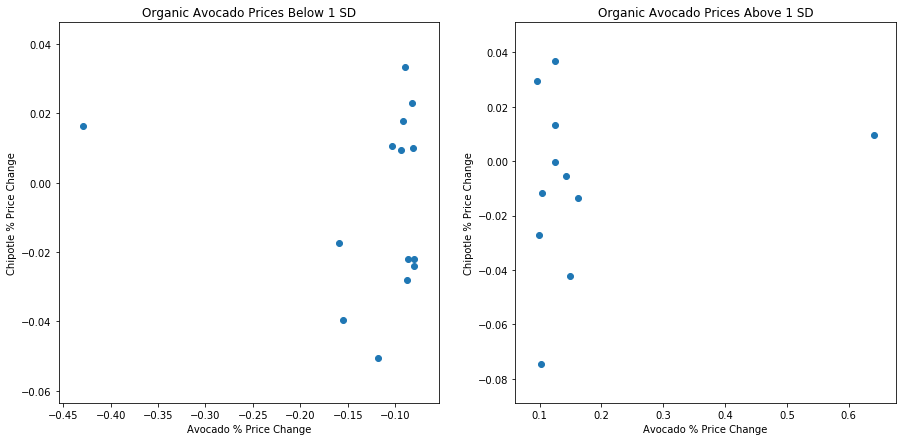

In [350]:
fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(122)
plt.scatter(org_sig_up['price % change'], org_sig_up['close % change'])
plt.title('Organic Avocado Prices Above 1 SD')
plt.ylabel('Chipotle % Price Change')
plt.xlabel('Avocado % Price Change')

plt.subplot(121)
plt.scatter(org_sig_down['price % change'], org_sig_down['close % change'])
plt.title('Organic Avocado Prices Below 1 SD')
plt.ylabel('Chipotle % Price Change')
plt.xlabel('Avocado % Price Change')

Text(0.5, 0, 'Avocado % Price Change')

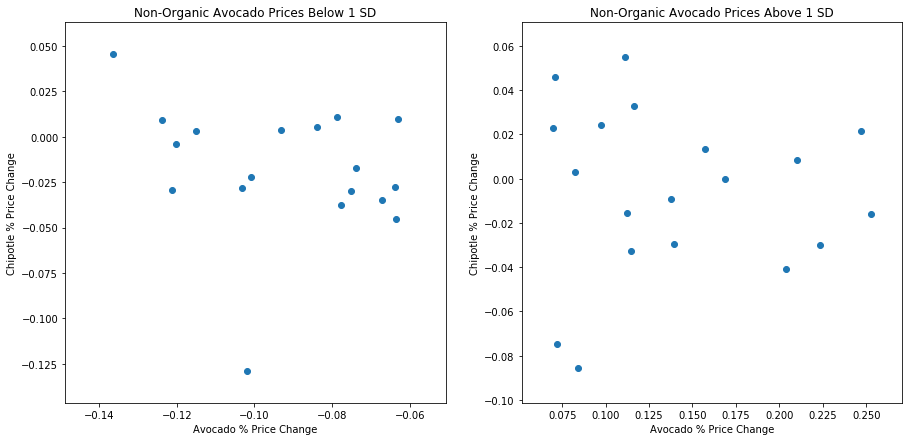

In [351]:
fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(122)
plt.scatter(nonorg_sig_up['price % change'], nonorg_sig_up['close % change'])
plt.title('Non-Organic Avocado Prices Above 1 SD')
plt.ylabel('Chipotle % Price Change')
plt.xlabel('Avocado % Price Change')

plt.subplot(121)
plt.scatter(nonorg_sig_down['price % change'], nonorg_sig_down['close % change'])
plt.title('Non-Organic Avocado Prices Below 1 SD')
plt.ylabel('Chipotle % Price Change')
plt.xlabel('Avocado % Price Change')

Text(0.5, 0, 'Date')

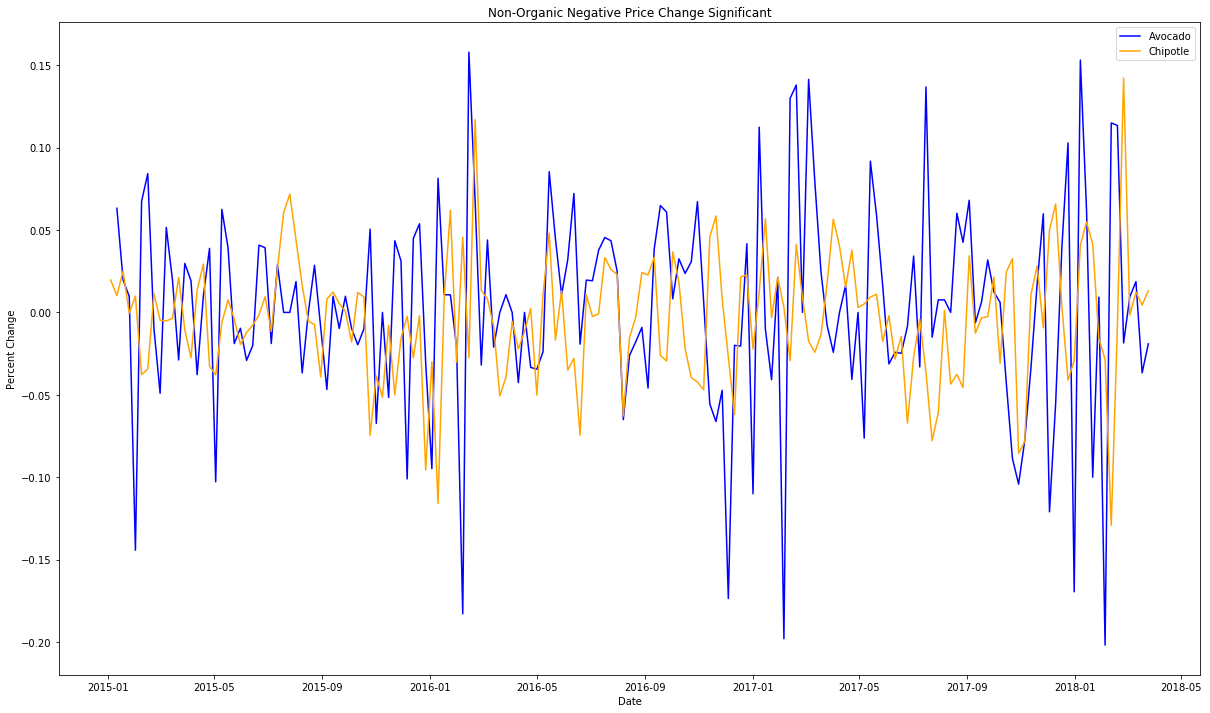

In [292]:
fig, ax = plt.subplots(figsize = (45,12))

start = 'January 01 2015'
end = 'May 01 2018'

plt.subplot(122)
plt.plot(nonorg_combined['price % change'], color = 'blue')
plt.plot(nonorg_combined['close % change'], color = 'orange')
plt.legend(('Avocado', 'Chipotle'))
plt.title('Non-Organic Negative Price Change Significant')
plt.ylabel('Percent Change')
plt.xlabel('Date')

**Between % Change in Avocado Price and % Difference between Weekly High/Low and Weekly Average Close**

Here we are trying to see if significant changes in avocado prices can cause Chipotle's stock to reach a high or fall to a law that is significant with regard to normal weekly fluctuations.

In [356]:
(nonorg_combined['high from close'].mean(), nonorg_combined['low from close'].mean())

(0.032527347216595046, -0.030950372119756715)

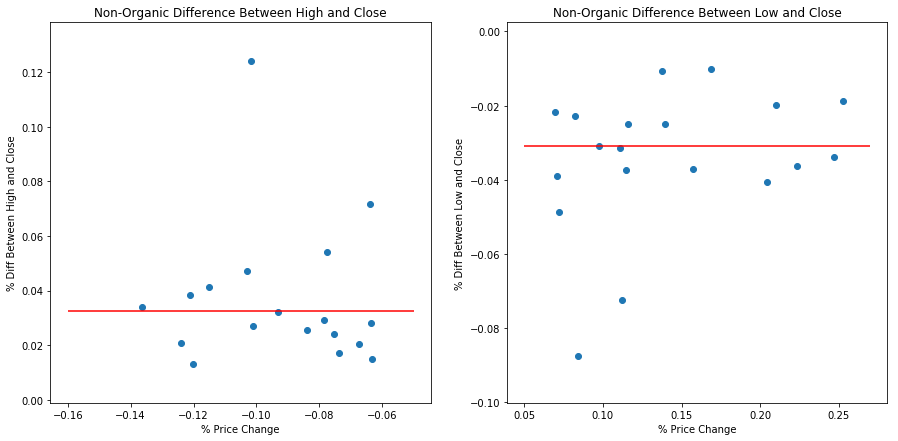

In [382]:
fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(122)
plt.scatter(nonorg_sig_up['price % change'], nonorg_sig_up['low from close'])
plt.title('Non-Organic Difference Between Low and Close')
plt.ylabel('% Diff Between Low and Close')
plt.xlabel('% Price Change')
plt.hlines(-.03095, .05, .27, color = 'red')

plt.subplot(121)
plt.scatter(nonorg_sig_down['price % change'], nonorg_sig_down['high from close'])
plt.title('Non-Organic Difference Between High and Close')
plt.ylabel('% Diff Between High and Close')
plt.xlabel('% Price Change')
plt.hlines(.03252, -.16, -.05, color = 'red')

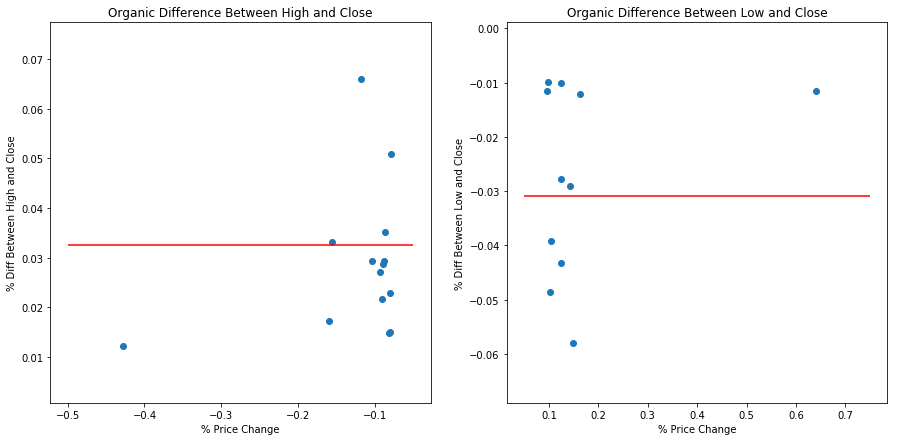

In [386]:
fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(122)
plt.scatter(org_sig_up['price % change'], org_sig_up['low from close'])
plt.title('Organic Difference Between Low and Close')
plt.ylabel('% Diff Between Low and Close')
plt.xlabel('% Price Change')
plt.hlines(-.03095, .05, .75, color = 'red')

plt.subplot(121)
plt.scatter(org_sig_down['price % change'], org_sig_down['high from close'])
plt.title('Organic Difference Between High and Close')
plt.ylabel('% Diff Between High and Close')
plt.xlabel('% Price Change')
plt.hlines(.03252, -.5, -.05, color = 'red')

**Between % Change in Avocado Price and % Change in Volume of Transactions**

Here we are trying to see if significant changes in avocado prices can impact the number of transactions that occur during the week.

In [387]:
nonorg_combined['volume'].mean()

5108740.928994083

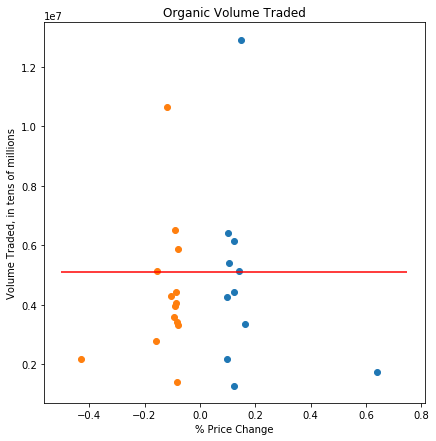

In [403]:
fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(122)
plt.scatter(org_sig_up['price % change'], org_sig_up['volume'])
plt.scatter(org_sig_down['price % change'], org_sig_down['volume'])
plt.title('Organic Volume Traded')
plt.ylabel('Volume Traded, in tens of millions')
plt.xlabel('% Price Change')
plt.hlines(5108741, -.5, .75, color = 'red')

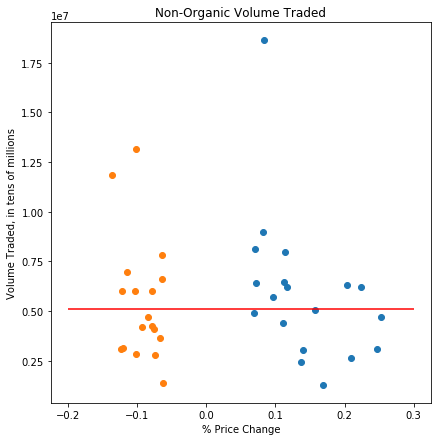

In [402]:
fig, ax = plt.subplots(figsize = (15,7))

plt.subplot(122)
plt.scatter(nonorg_sig_up['price % change'], nonorg_sig_up['volume'])
plt.scatter(nonorg_sig_down['price % change'], nonorg_sig_down['volume'])
plt.title('Non-Organic Volume Traded')
plt.ylabel('Volume Traded, in tens of millions')
plt.xlabel('% Price Change')
plt.hlines(5108741, -.2, .3, color = 'red')

### Summary

Looking at all three data comparisons observed, we draw the conclusion that we cannot observe a relationship between avocado prices and Chipotle trading price/activity; this is true for both organic and inorganic avocados.

In the comparison (scatter plot) between percent change of avocado prices and percent change of Chipotle's weekly average closing price, no correlation was observed. In a line graph with both percent change of Chipotle and avocado prices, the trend, over certain periods, seemed to positive instead of inverse - as in, Chipotle's share price would increase as avocado prices were increasing. This may be due to macroeconomic factors.

In the scatter plot that compared the change in avocado prices with the difference between the average share price and the high/low share price, no relationship could be seen again. On both graphs, I marked, with a line, the mean of the weekly difference between average share price and high/low share price, but the data points fell pretty equally on both sides of the line.

I took a similar approach to compare the change in avocado prices with the transaction volume. Marking the mean transaction volume per week, I saw that the number of transactions, again, for weeks where there was meaningful avocado price change, again fell on both sides of the line.

Therefore, I draw the conclusion that there is no **regular** relationship between avocado price and Chipotle share price. However, in situations where quarterly earnings are released that attribute higher earnings with lower avocado prices, it's possible that the share price will increase. The relationship between avocado and Chipotle price may not exist so concretely because, perhaps, people do not trade Chipotle's stock with avocado prices as a consistent factor/variable.

Lastly, I'd also like to acknowledge that perhaps the results may be different if I qualified meaningful change in avocado prices on its second standard deviation instead of its first.